-----------  
<font color=blue size=5>Прогнозирование конечных свойств новых материалов (композиционных материалов)</font>  
<font color=blue size=4>Prediction the final properties of new materials (composite materials)</font>  
___________

## Exploratory Data Analysis  
### Разведочный анализ исходных данных

### 1. Dataset description

На входе имеются данные о начальных свойствах компонентов композиционных материалов:  
- cоотношение матрица-наполнитель  
- плотность, кг/м<sup>3</sup>  
- количество отвердителя, м.%  
- содержание эпоксидных групп, %_2  
- температура вспышки, С_2 (температурный режим отверждения)  
- поверхностная плотность, г/м<sup>2</sup>  
- потребление смолы, г/м<sup>2</sup>  
- угол нашивки, град  
- шаг нашивки  
- плотность нашивки  
- модуль упругости, ГПа

На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов:  

- модуль упругости при растяжении, ГПа  
- прочность при растяжении, МПа

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


### 2. Data loading

In [2]:
X_bp = pd.read_excel('../data/raw/X_bp.xlsx', index_col=0)
X_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  Модуль упругости, ГПа   
0                         1.857143            2030.0             738.736842  \
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2   
0                        30.00                        22.267857  \
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2   
0                100.000000                          210.0  \
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа   
0                                  70.0                         3000.0  \
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [3]:
X_nup = pd.read_excel('../data/raw/X_nup.xlsx', index_col=0)
X_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [4]:
# joining to single dataframe
data = X_bp.merge(X_nup, how='inner', left_index=True, right_index=True)
len(data.columns)

13

### 3. General Analysis

In [5]:
def order_columns(df):
    """
    Функция упорядочивает столбцы,
    целевые признаки помещаются в конец датафрейма
    
    """
    
    df = df[['Количество отвердителя, м.%',
             'Содержание эпоксидных групп, %',
             'Температура вспышки, С',
             'Потребление смолы, г/м2',
             'Угол нашивки, град',
             'Шаг нашивки',
             'Плотность нашивки',
             'Плотность, кг/м3',
             'Поверхностная плотность, г/м2',
             'Модуль упругости, ГПа',
             'Соотношение матрица-наполнитель',
             'Модуль упругости при растяжении, ГПа',
             'Прочность при растяжении, МПа']]
    return df

In [6]:
data = data.rename(columns={
                  'Содержание эпоксидных групп,%_2': 'Содержание эпоксидных групп, %',
                  'Температура вспышки, С_2': 'Температура вспышки, С'})

In [7]:
# put target columns to the right part of dataframe
data = order_columns(data)

# sanity check
len(data.columns)

13

In [8]:
# save merged dataset
data.to_csv('../data/merged.csv', index=False)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Количество отвердителя, м.%           1023 non-null   float64
 1   Содержание эпоксидных групп, %        1023 non-null   float64
 2   Температура вспышки, С                1023 non-null   float64
 3   Потребление смолы, г/м2               1023 non-null   float64
 4   Угол нашивки, град                    1023 non-null   int64  
 5   Шаг нашивки                           1023 non-null   float64
 6   Плотность нашивки                     1023 non-null   float64
 7   Плотность, кг/м3                      1023 non-null   float64
 8   Поверхностная плотность, г/м2         1023 non-null   float64
 9   Модуль упругости, ГПа                 1023 non-null   float64
 10  Соотношение матрица-наполнитель       1023 non-null   float64
 11  Модуль упругости при р

In [10]:
# NaN-values
data.isna().sum().sum()

0

In [11]:
# duplicate rows
data.duplicated().sum()

0

In [12]:
data.describe().T

count         mean         std   
Количество отвердителя, м.%           1023.0   110.570769   28.295911  \
Содержание эпоксидных групп, %        1023.0    22.244390    2.406301   
Температура вспышки, С                1023.0   285.882151   40.943260   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   

                                              min          25%          50%   
Количество отвердителя, м.%             17.740275    92.443497   110.564840  \
Содержание эпоксидных групп, %          14.254985    20.608034    22.230744   
Температура вспышки, С                 100.000000   259.066528   285.896812   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   

                                              75%          max  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп, %          23.961934    33.000000  
Температура вспышки, С                 313.002106   413.273418  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901  
Плотность, кг/м3                      2021.374375  2207.773481  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости, ГПа                  961.812526  1911.536477  
Соотношение матрица-наполнитель          3.552660     5.591742  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732

In [13]:
data.nunique()

Количество отвердителя, м.%             1005
Содержание эпоксидных групп, %          1004
Температура вспышки, С                  1003
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
Плотность, кг/м3                        1013
Поверхностная плотность, г/м2           1004
Модуль упругости, ГПа                   1020
Соотношение матрица-наполнитель         1014
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
dtype: int64

### 4. Data Distribution

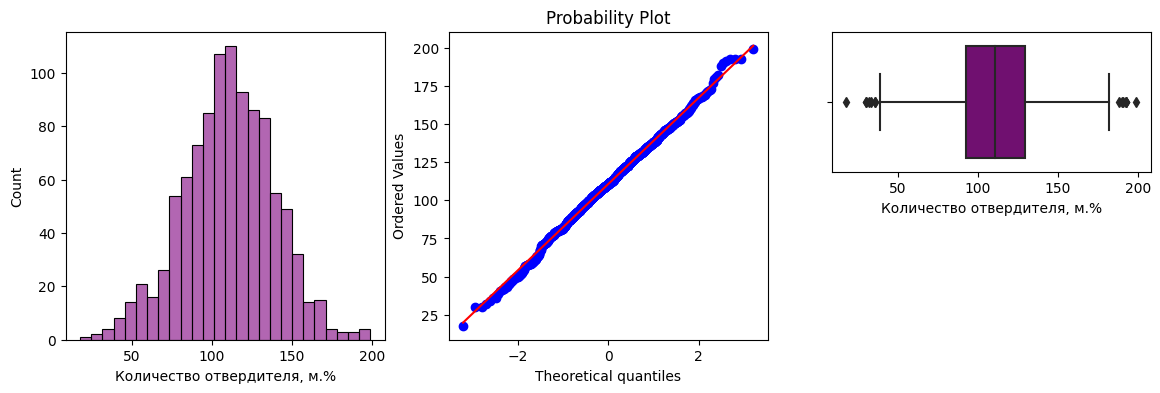

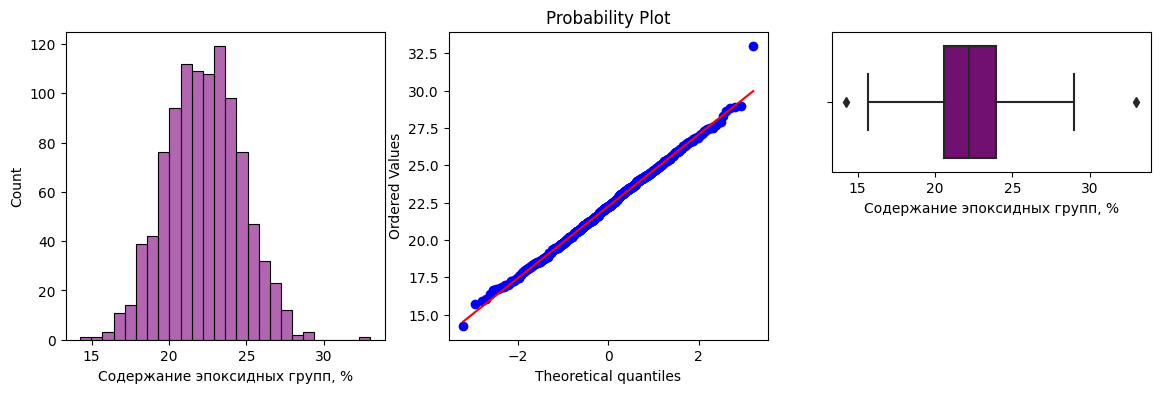

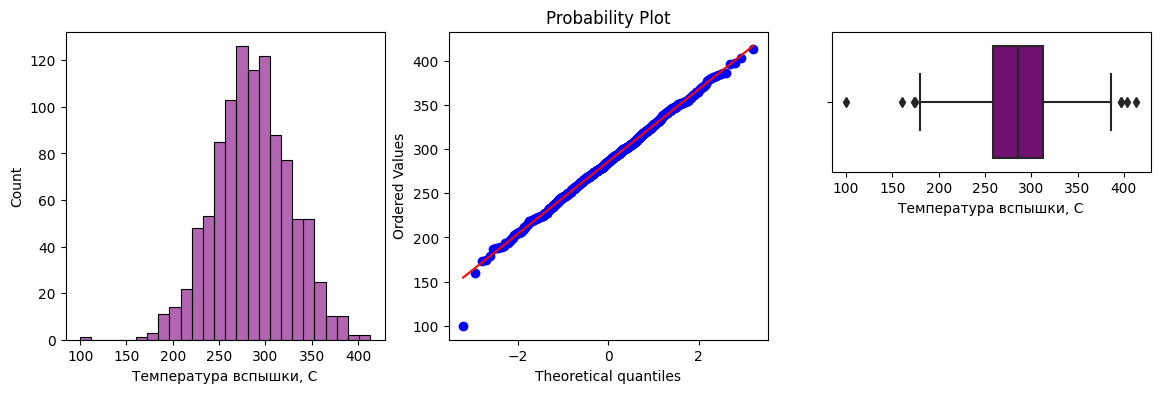

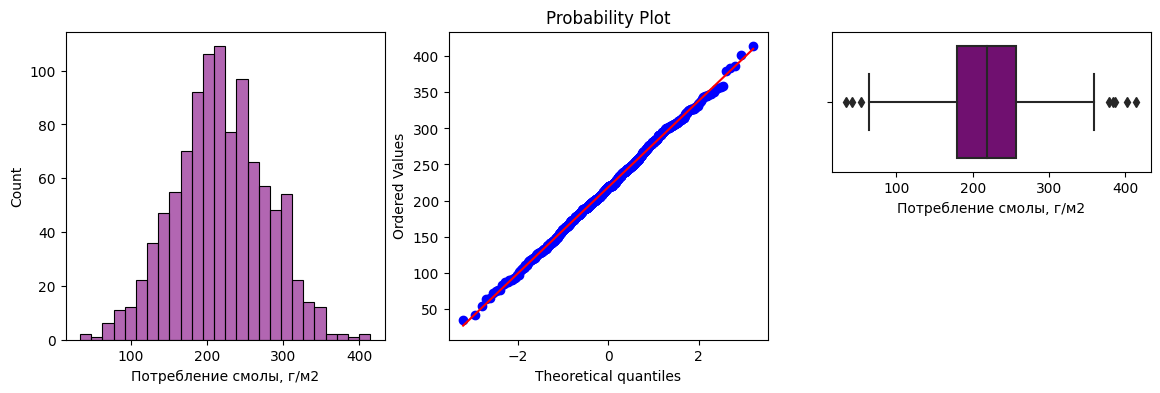

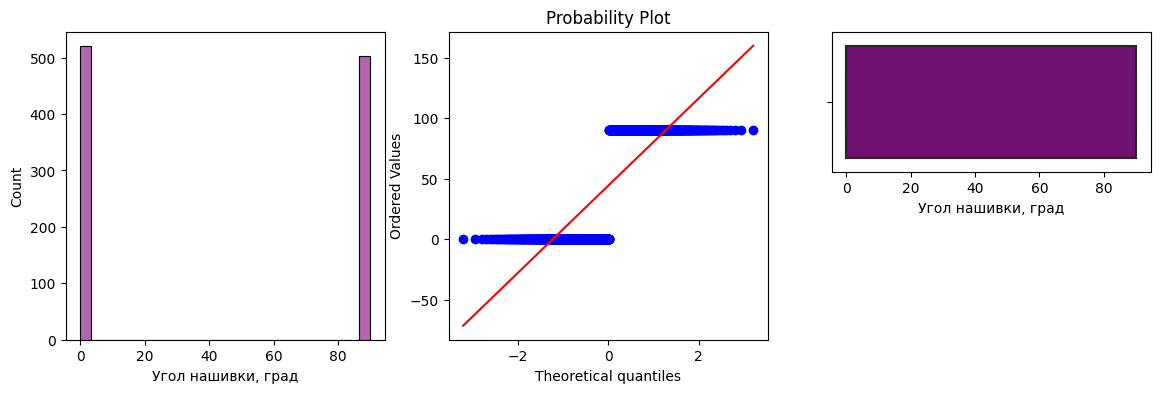

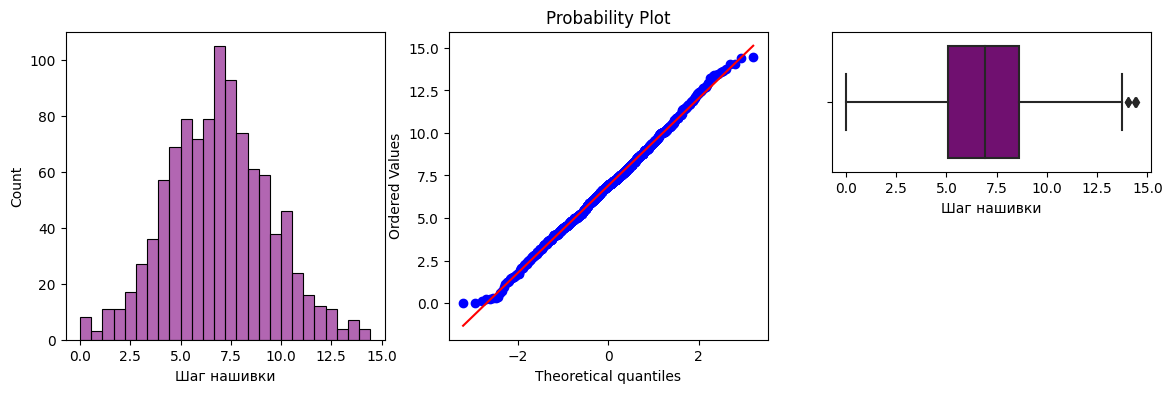

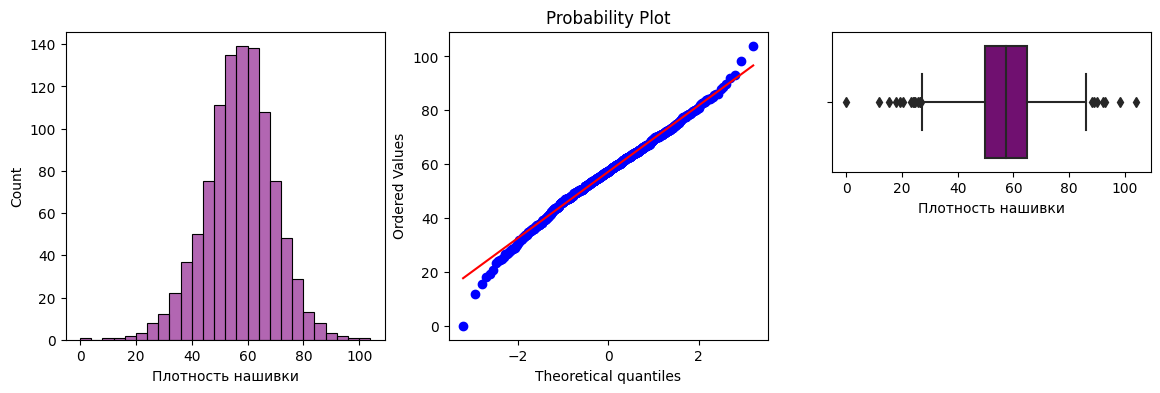

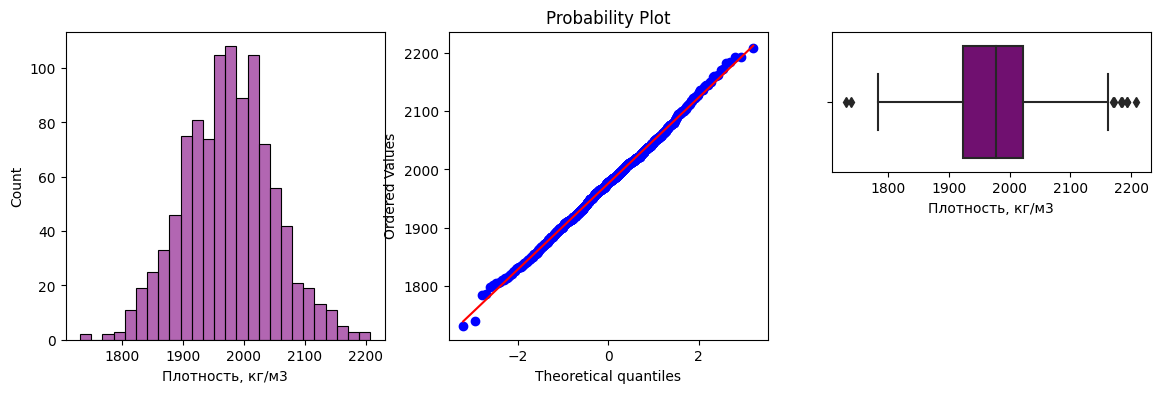

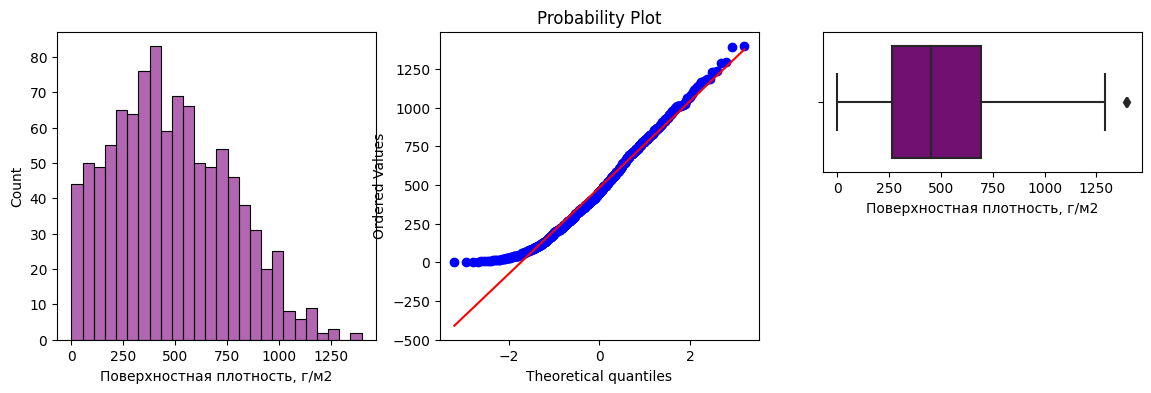

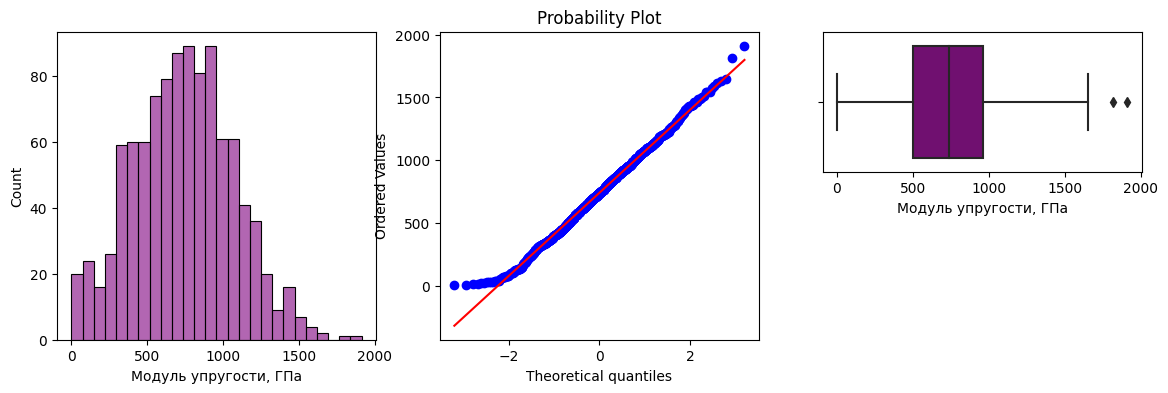

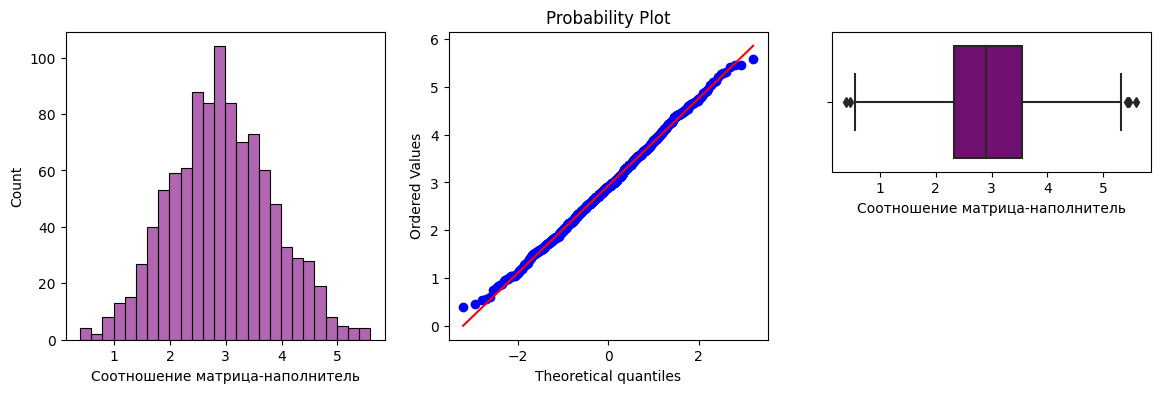

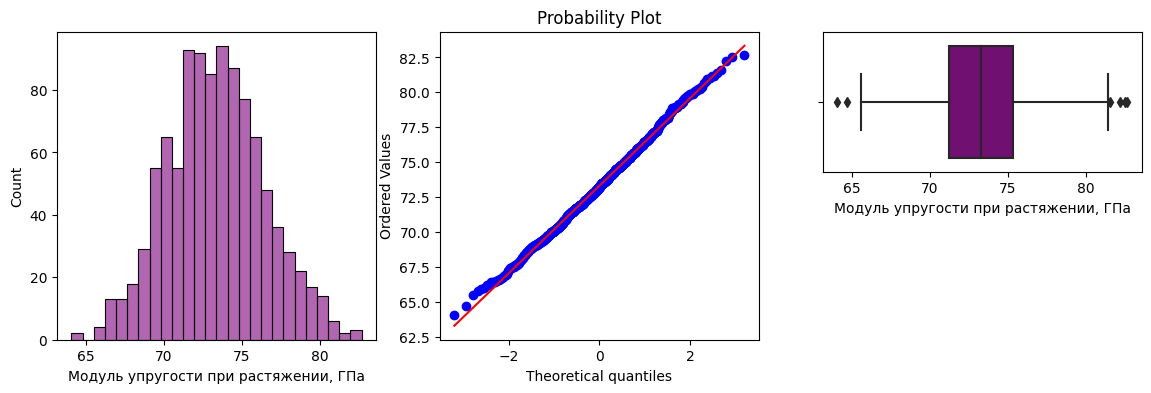

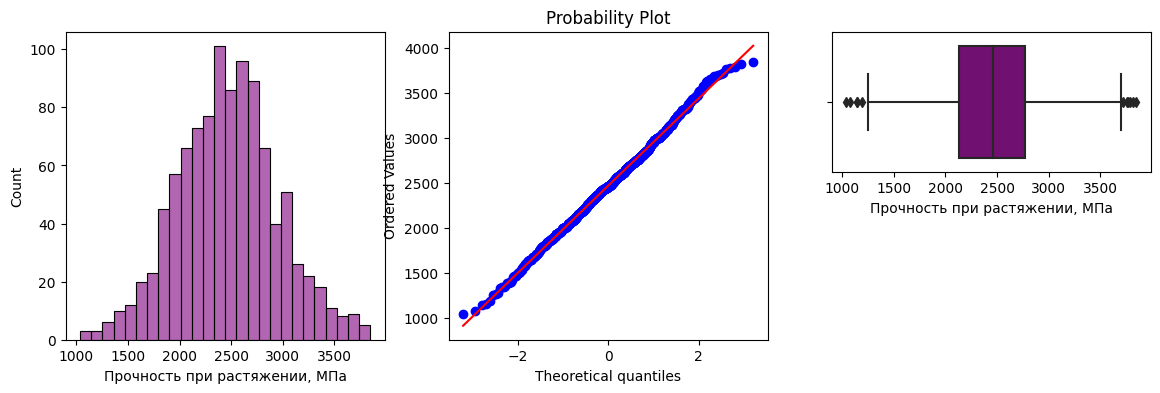

In [14]:
for column in data.columns:
        plt.figure(figsize=(14,4))
        # гистограмма
        plt.subplot(1, 3, 1)
        sns.histplot(data, x=column, bins=26, color='purple', alpha=0.6)
        # Q-Q plot
        plt.subplot(1, 3, 2)
        stats.probplot(data[column], dist="norm", plot=plt)
        # ящик с усами
        plt.subplot(2, 3, 3)
        sns.boxplot(x=data[column], color='purple')
        plt.show()
        print()

<font size=4>Распределение почти всех признаков выглядит нормальным, за исключением трех преременных. Так, распределение поверхностной плотности и модуля упругости несколько скошены влево, а угол нашивки имеет строго два параметра, 0<sup>o</sup> или 90<sup>o</sup>.</font>  

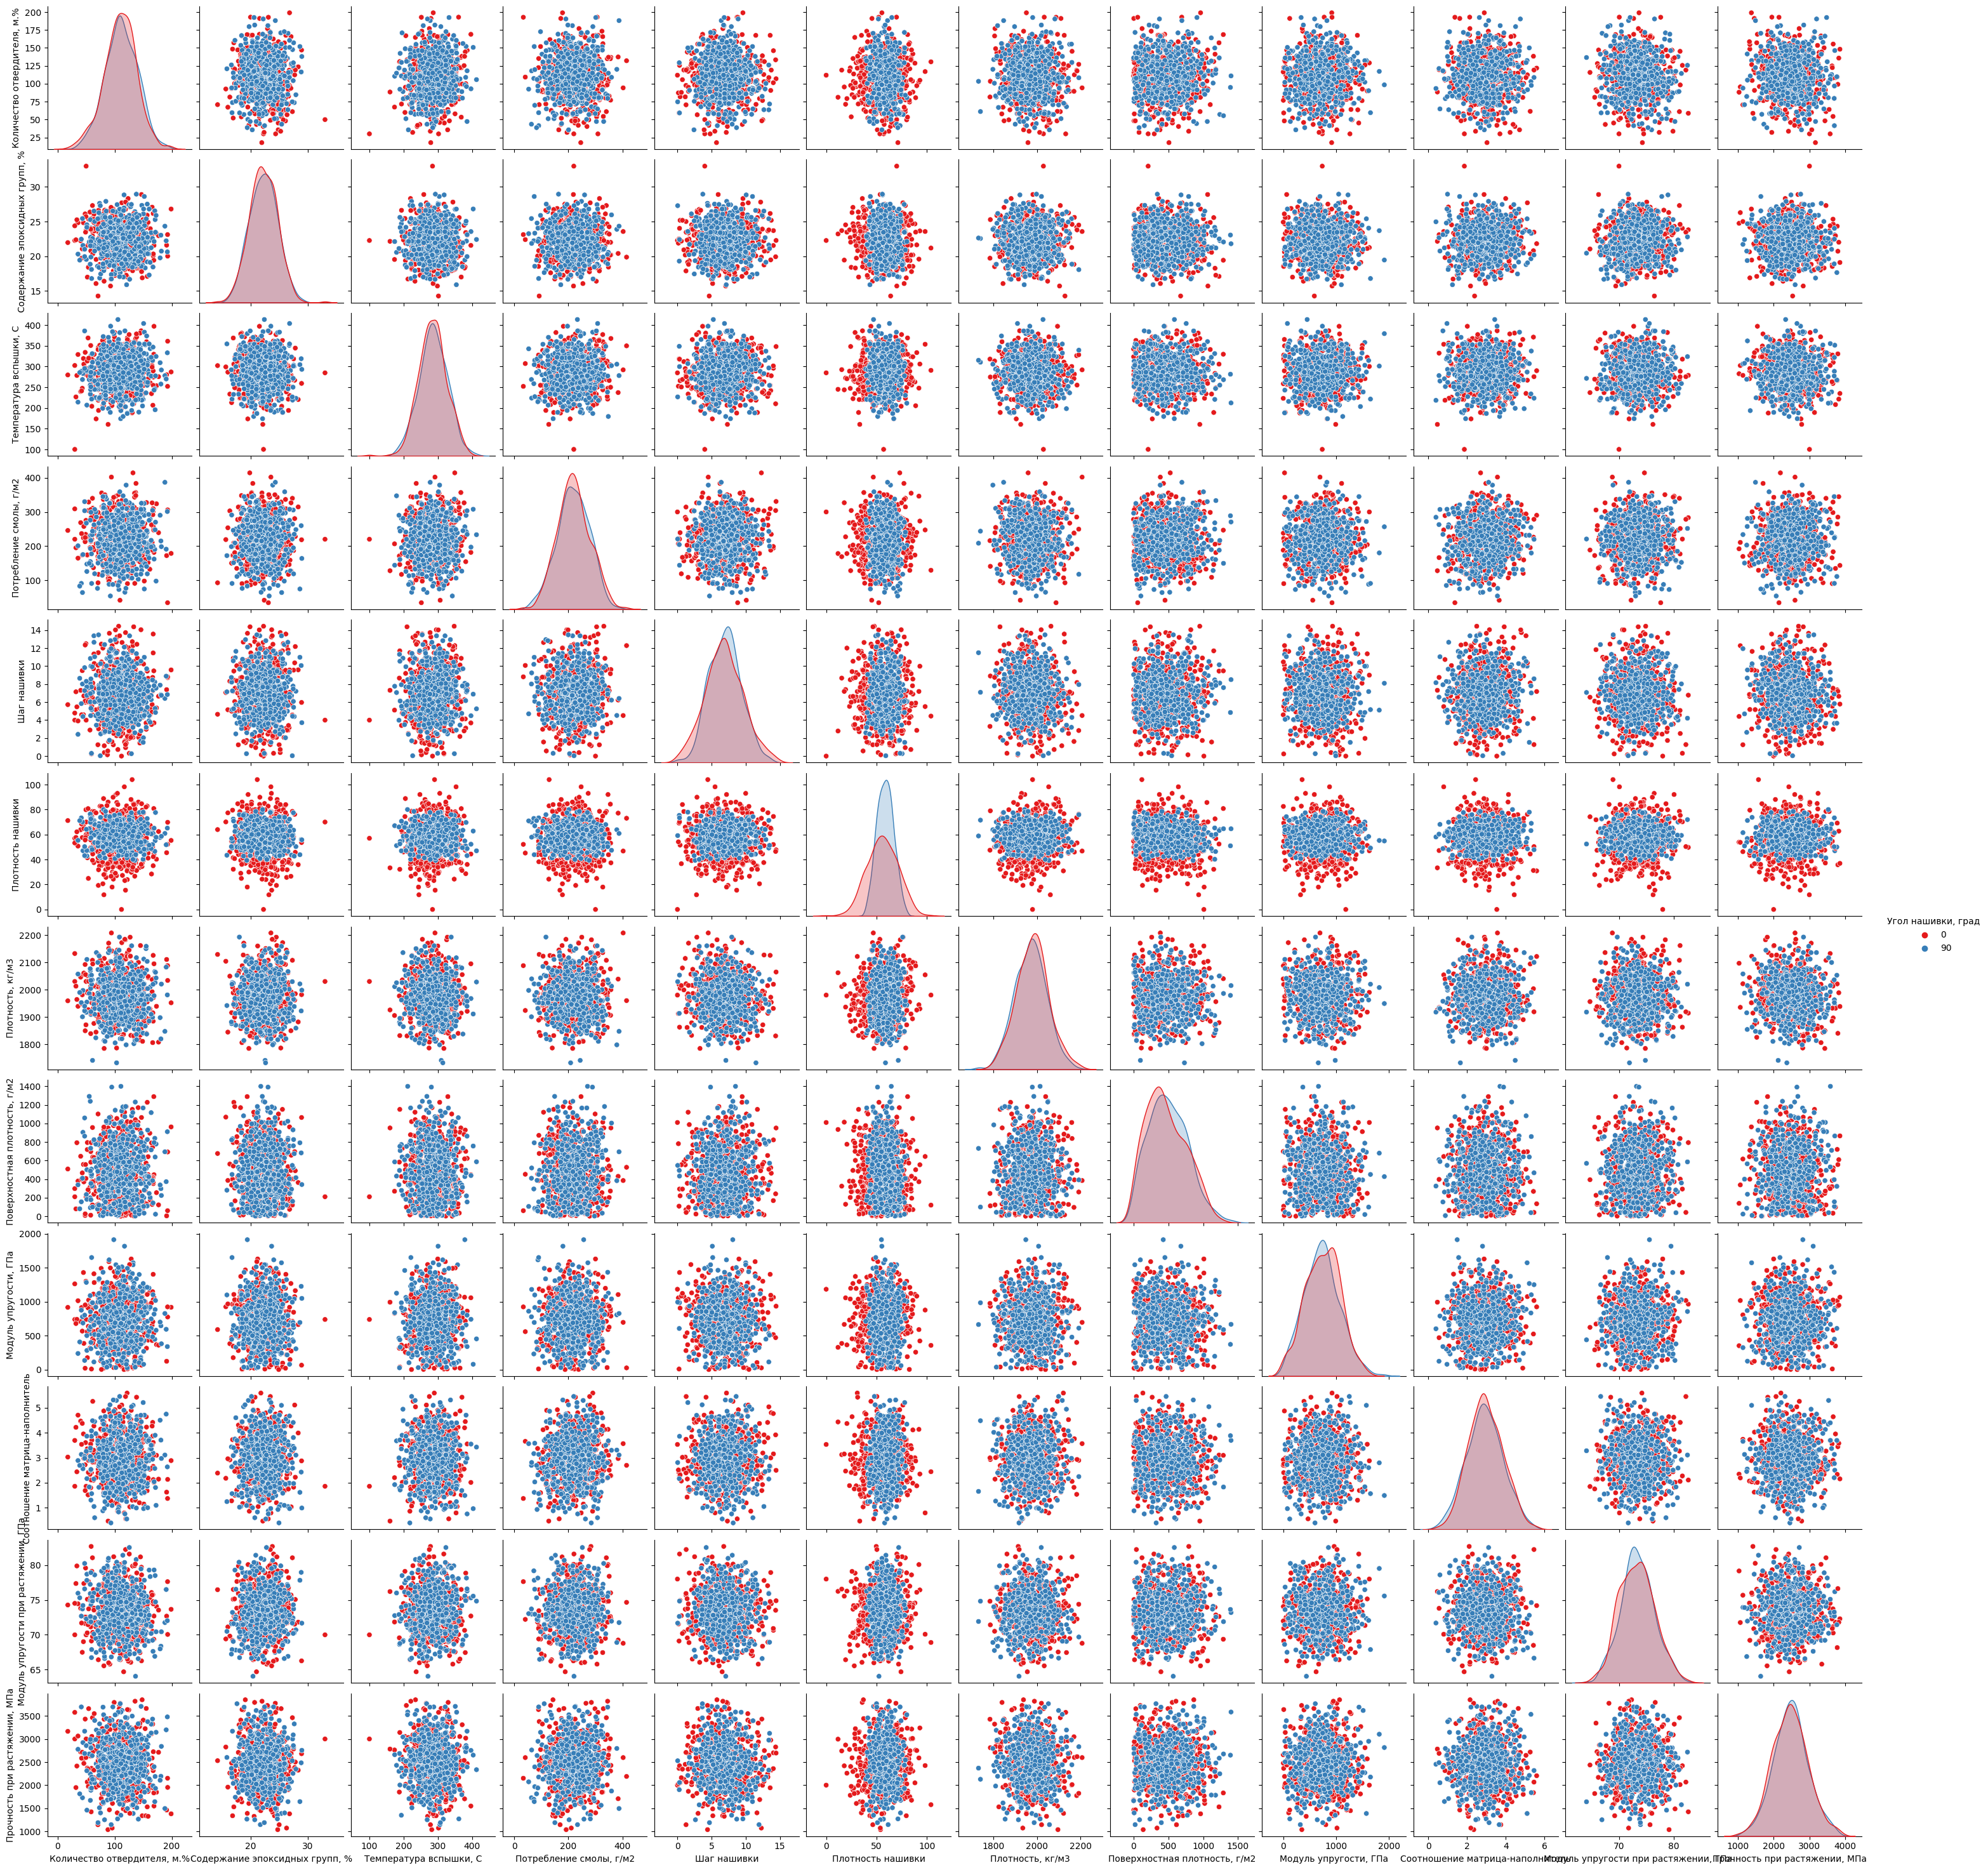

In [16]:
# Попарные графики рассеяния точек, угол нашивки выделен цветом

sns.pairplot(data, hue="Угол нашивки, град", palette="Set1")

### 5. Data Correlation

<Axes: >

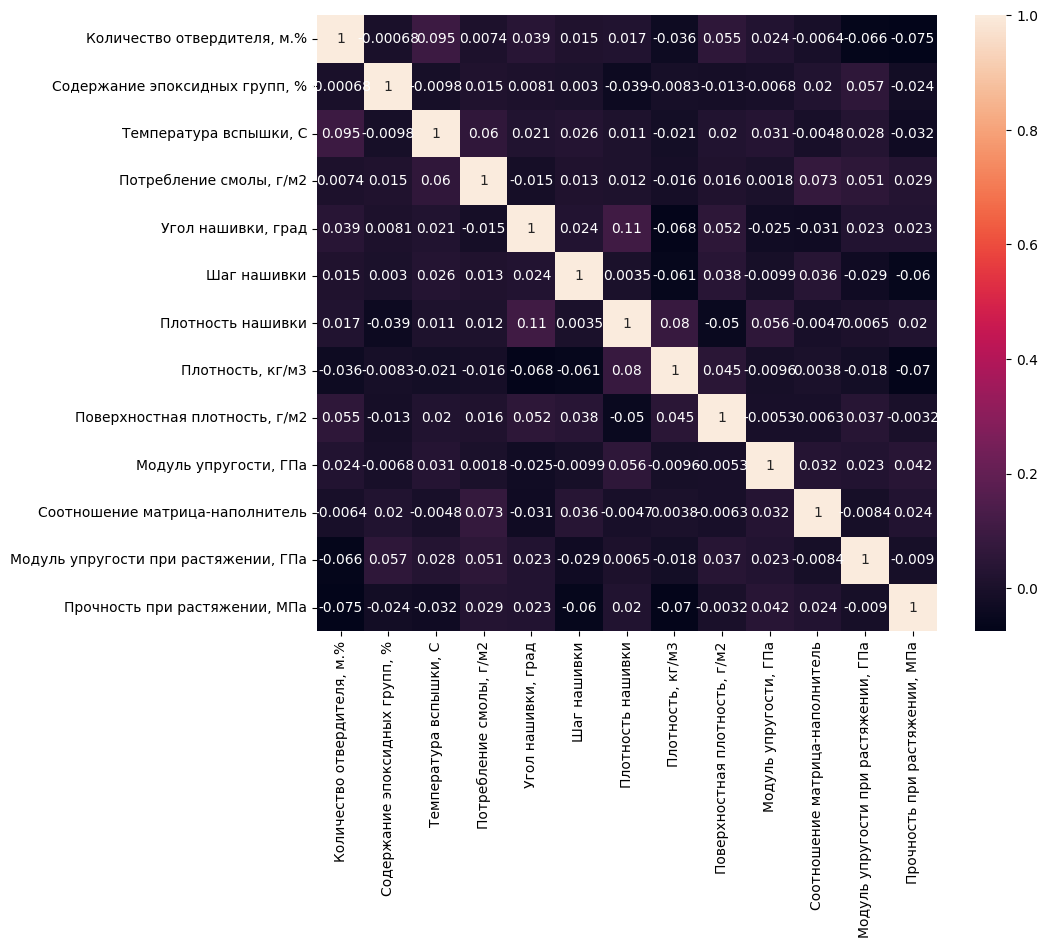

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)

<font size=4>Низкие коэффициенты попарной корреляции между признаками указывают на отсутствие или наличие слабой линейной связи между признаками. Кроме того, связь между признаками может быть нелинейной или не монотонной, могут существовать скрытые зависимости между признаками, которые не учитываются при расчете коэффициента корреляции.</font>  
  

[Далее](https://github.com/Svkhorol/Diploma-Project-Bauman-MSTU/blob/main/notebooks/2_Synthetic_Data.ipynb)  
[К содержанию](https://github.com/Svkhorol/Diploma-Project-Bauman-MSTU/blob/main/README.md)